In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape


(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable has imbalanced class distribution. Positive class (Churn=Yes) is much less than negative class (churn=No). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [6]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [7]:
#categorical features with binary classes
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# categorical features with multi classes
multiple_col_cats=['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod']

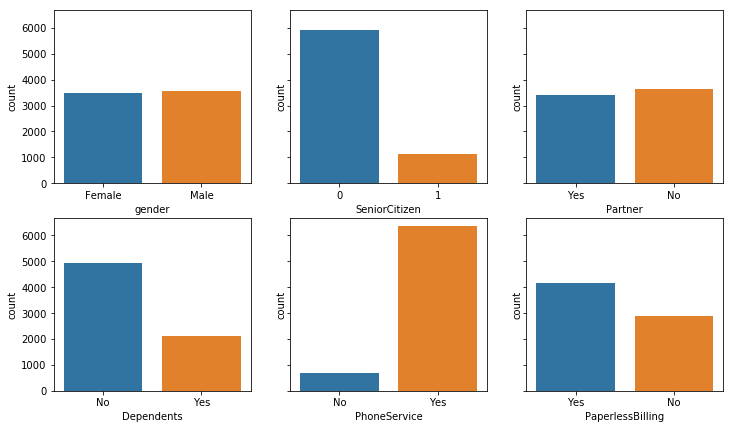

In [10]:
# Binary Categorical Features
# Let’s check the class distribution of binary features.

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [11]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [12]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [13]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


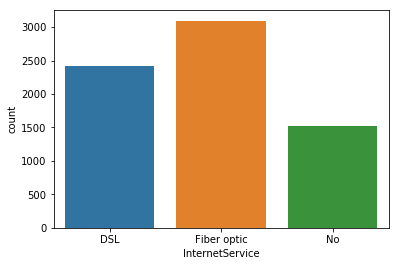

In [14]:
sns.countplot("InternetService", data=df)

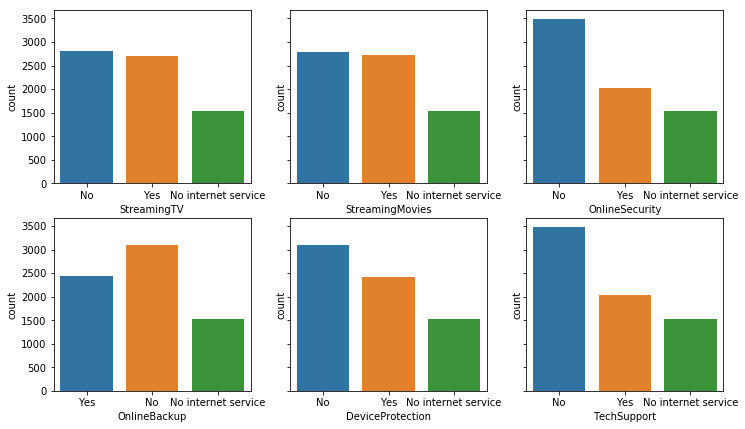

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [16]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [17]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

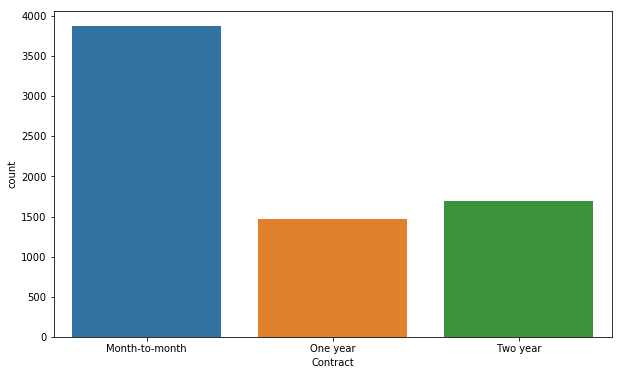

In [18]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

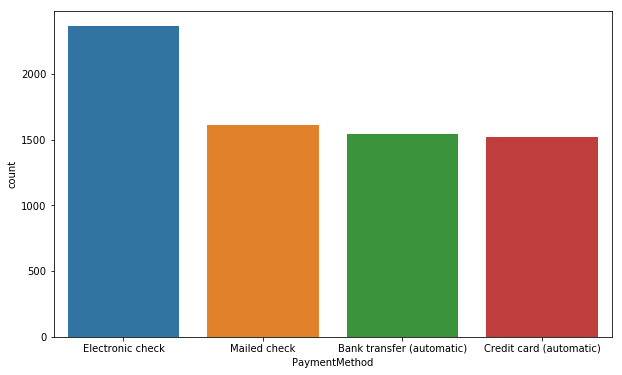

In [19]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

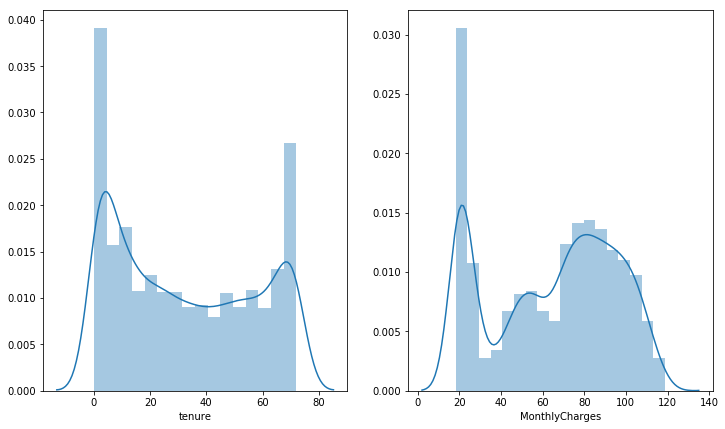

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [21]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [22]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [24]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [25]:
X.shape

(7043, 26)

Text(0.5,1,'Class Distribution Before Resampling')

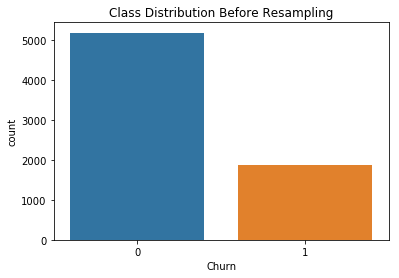

In [26]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [27]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [28]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5,1,'Class Distribution After Resampling')

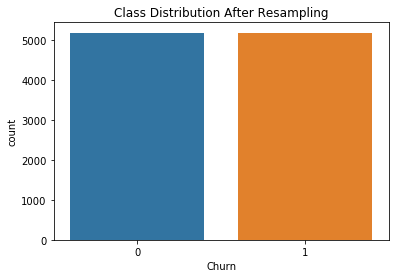

In [29]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [30]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [40]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [41]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)


0.7574293307562213

In [42]:
# The above model accuracy is 0.7574293307562213

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.888620439719739

In [45]:
 # Random Forest MOdel accuracy is 88 percent the best accuracy as compare to previous model
 # Now we improve Random Forest model accuracy using GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50,100,150,200,250,300,350,400,450,500], 'max_depth':[5,10,15,20,25,30,35,40,45,50]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [55]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
clf.best_params_

{'max_depth': 50, 'n_estimators': 100}

In [57]:
clf.best_score_

0.9012369540007731

In [56]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Using TensorFlow backend.


In [58]:
def generate_report():
    # predicting values
    y_pred = classifier.predict(X_test)
    print("\nPredicted values: "+str(y_pred)+"\n")
    y_pred = (y_pred > 0.5)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0,0]+cm[1, 1])/(cm[0,0]+cm[1, 1]+cm[1,0]+cm[0, 1])
    print("\nTest Accuracy: "+str(accuracy)+"\n")
    






# Build basic ANN model 
def build_model():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = build_model()
classifier.fit(X_train, y_train, batch_size = 32, epochs = 1000)
generate_report()

==============================] - 0s 46us/step - loss: 0.4879 - accuracy: 0.7630
Epoch 817/1000
8278/8278 [==============================] - 0s 46us/step - loss: 0.4887 - accuracy: 0.7615
Epoch 818/1000
8278/8278 [==============================] - 0s 48us/step - loss: 0.4875 - accuracy: 0.7584
Epoch 819/1000
8278/8278 [==============================] - 0s 45us/step - loss: 0.4877 - accuracy: 0.7611
Epoch 820/1000
8278/8278 [==============================] - 0s 43us/step - loss: 0.4880 - accuracy: 0.7602
Epoch 821/1000
8278/8278 [==============================] - 0s 46us/step - loss: 0.4876 - accuracy: 0.7597
Epoch 822/1000
8278/8278 [==============================] - 0s 44us/step - loss: 0.4876 - accuracy: 0.7604
Epoch 823/1000
8278/8278 [==============================] - 0s 41us/step - loss: 0.4874 - accuracy: 0.7606
Epoch 824/1000
8278/8278 [==============================] - 0s 48us/step - loss: 0.4876 - accuracy: 0.7596
Epoch 825/1000
8278/8278 [==============================] - 0s 

In [69]:
X_train.shape[1]

25

TypeError: 'int' object is not iterable

In [60]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


input_layer = Input(shape=(X_train.shape[1],))

dense_layer_1 = Dense(60, activation='relu')(input_layer)
# dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(64, activation='relu')(dense_layer_2)
# dense_layer_4 = Dense(64, activation='relu')(dense_layer_3)
# dense_layer_5 = Dense(32, activation='relu')(dense_layer_4)
# dense_layer_6 = Dense(32, activation='relu')(dense_layer_5)
# dense_layer_7 = Dense(16, activation='relu')(dense_layer_6)
# dense_layer_8 = Dense(16, activation='relu')(dense_layer_7)
# dense_layer_9 = Dense(8, activation='relu')(dense_layer_8)
# dense_layer_10 = Dense(8, activation='relu')(dense_layer_9)
# dense_layer_11 = Dense(4, activation='relu')(dense_layer_10)
# dense_layer_12 = Dense(4, activation='relu')(dense_layer_11)
# dense_layer_13 = Dense(2, activation='relu')(dense_layer_12)
dense_layer_14 = Dense(30, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_14)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=32, epochs=1000, verbose=1, validation_split=0.2)


score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7160 - val_acc: 0.8219
Epoch 460/1000
6622/6622 [==============================] - 0s 56us/sample - loss: 0.1846 - acc: 0.9237 - val_loss: 0.6958 - val_acc: 0.8080
Epoch 461/1000
6622/6622 [==============================] - 0s 66us/sample - loss: 0.1826 - acc: 0.9230 - val_loss: 0.6873 - val_acc: 0.8122
Epoch 462/1000
6622/6622 [==============================] - 0s 58us/sample - loss: 0.1861 - acc: 0.9206 - val_loss: 0.7038 - val_acc: 0.8110
Epoch 463/1000
6622/6622 [==============================] - 0s 59us/sample - loss: 0.1852 - acc: 0.9210 - val_loss: 0.6885 - val_acc: 0.8152
Epoch 464/1000
6622/6622 [==============================] - 0s 58us/sample - loss: 0.1844 - acc: 0.9228 - val_loss: 0.7045 - val_acc: 0.8213
Epoch 465/1000
6622/6622 [==============================] - 0s 57us/sample - loss: 0.1850 - acc: 0.9221 - val_loss: 0.6826 - val_acc: 0.8062
Epoch 466/1000
6622/6622 [==============================] - 0s 66us/sample - loss: 0.1852 - acc: 0.9197 - val_loss: 0.7231 - val_ac

KeyboardInterrupt: 

In [63]:
# Binary Classification with Sonar Dataset: Standardized Larger
# from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
# dataframe = read_csv("sonar.csv", header=None)
# dataset = dataframe.values
# split into input (X) and output (Y) variables
# X = dataset[:,0:60].astype(float)
# Y = dataset[:,60]
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=25, activation='relu'))
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
# estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 83.55% (1.13%)


In [75]:

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.756664 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [76]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7474637681159421, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7576086956521739, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.747643219724438, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7485507246376811, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.75

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [77]:
grid.best_score_

0.8271321575259725

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [37]:
params = {
        'min_child_weight': [1, 5, 10,15,20,25],
        'gamma': [0.5, 1, 1.5, 2, 2.5,3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,8,14,18,22]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
# timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   54.2s finished
[20:41:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000016A7846A848>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=None, max_depth=None,
       min_child_w...one, silent=True, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10, 15, 20, 25], 'gamma': [0.5, 1, 1.5, 2, 2.5, 3], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5, 8, 14, 18, 22]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [38]:
random_search.best_score_

0.8882765324396207